In [2]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.stats import norm

The binomial distribution is suitable here because it expresses the number of success (number of people voting yes for example) from N Bernoulli trials (N independent individuals voting yes/no). It is also has little skewness (a good approximation of a bell curve) when N is large. Using this approximation - $\mathcal{N}(x|np, np(1-p))$ (or its Taylor approximation alternatives for p: $\mathcal{N}(p|\bar{x}/n, (n-\bar{x})\bar{x}/n^3)$) we can confirm the $2\%$ error margin for 95 percent CI of N=1000 and p=$10\%$.

In [8]:
def CI_95(N, p): 
    mean_ = p
    var_ = p*(1-p)/N
    dist = norm(loc=mean_, scale=np.sqrt(var_))
    margin = (dist.interval(0.95)[1]-p)*100
    print('Error margin for {0} is: {1:0.0f}%'.format(str(p), margin))
    x = np.linspace(0,1,1000)
    plt.plot(x, dist.pdf(x), label=N)
    return dist.interval(0.95)

CI_95(1000,0.1)

Error margin for 0.1 is: 2%


(0.08140614903086316, 0.11859385096913685)

In [9]:
for i in [100,250,500,750,1000]:
    print('Printing error margins for {}...'.format(str(i)))
    for _ in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
        CI_95(i, _)

Printing error margins for 100...
Error margin for 0.1 is: 6%
Error margin for 0.2 is: 8%
Error margin for 0.3 is: 9%
Error margin for 0.4 is: 10%
Error margin for 0.5 is: 10%
Error margin for 0.6 is: 10%
Error margin for 0.7 is: 9%
Error margin for 0.8 is: 8%
Error margin for 0.9 is: 6%
Printing error margins for 250...
Error margin for 0.1 is: 4%
Error margin for 0.2 is: 5%
Error margin for 0.3 is: 6%
Error margin for 0.4 is: 6%
Error margin for 0.5 is: 6%
Error margin for 0.6 is: 6%
Error margin for 0.7 is: 6%
Error margin for 0.8 is: 5%
Error margin for 0.9 is: 4%
Printing error margins for 500...
Error margin for 0.1 is: 3%
Error margin for 0.2 is: 4%
Error margin for 0.3 is: 4%
Error margin for 0.4 is: 4%
Error margin for 0.5 is: 4%
Error margin for 0.6 is: 4%
Error margin for 0.7 is: 4%
Error margin for 0.8 is: 4%
Error margin for 0.9 is: 3%
Printing error margins for 750...
Error margin for 0.1 is: 2%
Error margin for 0.2 is: 3%
Error margin for 0.3 is: 3%
Error margin for 0.4 

Error margin for 0.1 is: 6%
Error margin for 0.1 is: 4%
Error margin for 0.1 is: 3%
Error margin for 0.1 is: 2%
Error margin for 0.1 is: 2%


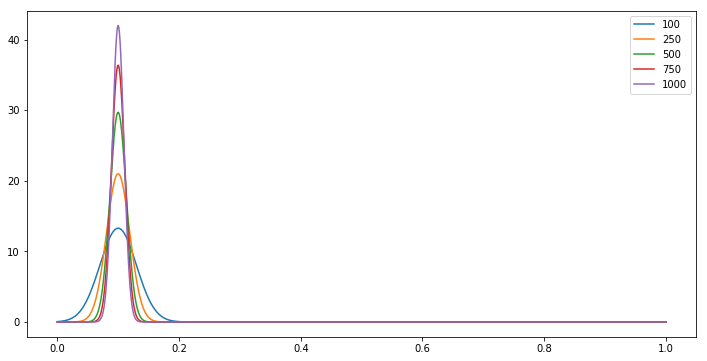

In [9]:
plt.figure(figsize=(12,6))

for i in [100,250,500,750,1000]:
    CI_95(i, 0.1)
    
plt.legend()
plt.show()

I think the inconsistence between the normal approximations presented here compared to on the polling table in the link is because the table did not use a normal approximation of the binomial distribution but instead relies on the assumption that for large N the skewness of the binomial distribution is negligible and therefore it can be considered practically normal. Since the table is approximating a discrete distribution with a continuous distribution, a correction is needed and it is provided in the Laplace approximation. 

In [10]:
def CI_95_0correct(N, p): 
    mean_ = N*p
    var_ = p*(1-p)*N
    dist = norm(loc=mean_, scale=np.sqrt(var_))
    margin = (dist.interval(0.95)[1]-mean_)/N*100
    print('Error margin for {0} is: {1:0.0f}%'.format(str(p), margin))
    x = np.linspace(0,1,1000)
#     plt.plot(x, dist.pdf(x), label=N)
    return dist.interval(0.95)

CI_95_0correct(1000,0.1)

Error margin for 0.1 is: 2%


(81.40614903086315, 118.59385096913685)

In [11]:
for i in [100,250,500,750,1000]:
    print('Printing error margins for {}...'.format(str(i)))
    for _ in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]:
        CI_95_0correct(i, _)

Printing error margins for 100...
Error margin for 0.1 is: 6%
Error margin for 0.2 is: 8%
Error margin for 0.3 is: 9%
Error margin for 0.4 is: 10%
Error margin for 0.5 is: 10%
Error margin for 0.6 is: 10%
Error margin for 0.7 is: 9%
Error margin for 0.8 is: 8%
Error margin for 0.9 is: 6%
Printing error margins for 250...
Error margin for 0.1 is: 4%
Error margin for 0.2 is: 5%
Error margin for 0.3 is: 6%
Error margin for 0.4 is: 6%
Error margin for 0.5 is: 6%
Error margin for 0.6 is: 6%
Error margin for 0.7 is: 6%
Error margin for 0.8 is: 5%
Error margin for 0.9 is: 4%
Printing error margins for 500...
Error margin for 0.1 is: 3%
Error margin for 0.2 is: 4%
Error margin for 0.3 is: 4%
Error margin for 0.4 is: 4%
Error margin for 0.5 is: 4%
Error margin for 0.6 is: 4%
Error margin for 0.7 is: 4%
Error margin for 0.8 is: 4%
Error margin for 0.9 is: 3%
Printing error margins for 750...
Error margin for 0.1 is: 2%
Error margin for 0.2 is: 3%
Error margin for 0.3 is: 3%
Error margin for 0.4 